In [1]:
!pip install pandas openpyxl


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import missingno

In [3]:
csv_file_path = 'Data-Model-Pizza-Sales.csv'
df = pd.read_csv(csv_file_path)



In [4]:
print(df.head())

   order_details_id  order_id       pizza_id  quantity order_date order_time  \
0                 1         1     hawaiian_m         1   1/1/2015   11:38:36   
1                 2         2  classic_dlx_m         1   1/1/2015   11:57:40   
2                 3         2  five_cheese_l         1   1/1/2015   11:57:40   
3                 4         2    ital_supr_l         1   1/1/2015   11:57:40   
4                 5         2     mexicana_m         1   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella 

In [5]:
print(df.dtypes)

order_details_id       int64
order_id               int64
pizza_id              object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object


In [6]:
df = df.astype({col: 'string' for col in df.select_dtypes('object').columns})
df['order_date'] = pd.to_datetime(df['order_date']).dt.date
print(df.dtypes)

<ipython-input-6-7f245245274e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_time'] = pd.to_datetime(df['order_time']).dt.time


order_details_id              int64
order_id                      int64
pizza_id             string[python]
quantity                      int64
order_date                   object
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size           string[python]
pizza_category       string[python]
pizza_ingredients    string[python]
pizza_name           string[python]
dtype: object


In [7]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.time

In [8]:
print(df.dtypes)

order_details_id              int64
order_id                      int64
pizza_id             string[python]
quantity                      int64
order_date                   object
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size           string[python]
pizza_category       string[python]
pizza_ingredients    string[python]
pizza_name           string[python]
dtype: object


In [9]:
df.shape

(48620, 12)

In [10]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [11]:
{x:df[x].duplicated().sum() for x in df}

{'order_details_id': 0,
 'order_id': 27270,
 'pizza_id': 48529,
 'quantity': 48616,
 'order_date': 48262,
 'order_time': 32238,
 'unit_price': 48595,
 'total_price': 48564,
 'pizza_size': 48615,
 'pizza_category': 48616,
 'pizza_ingredients': 48588,
 'pizza_name': 48588}

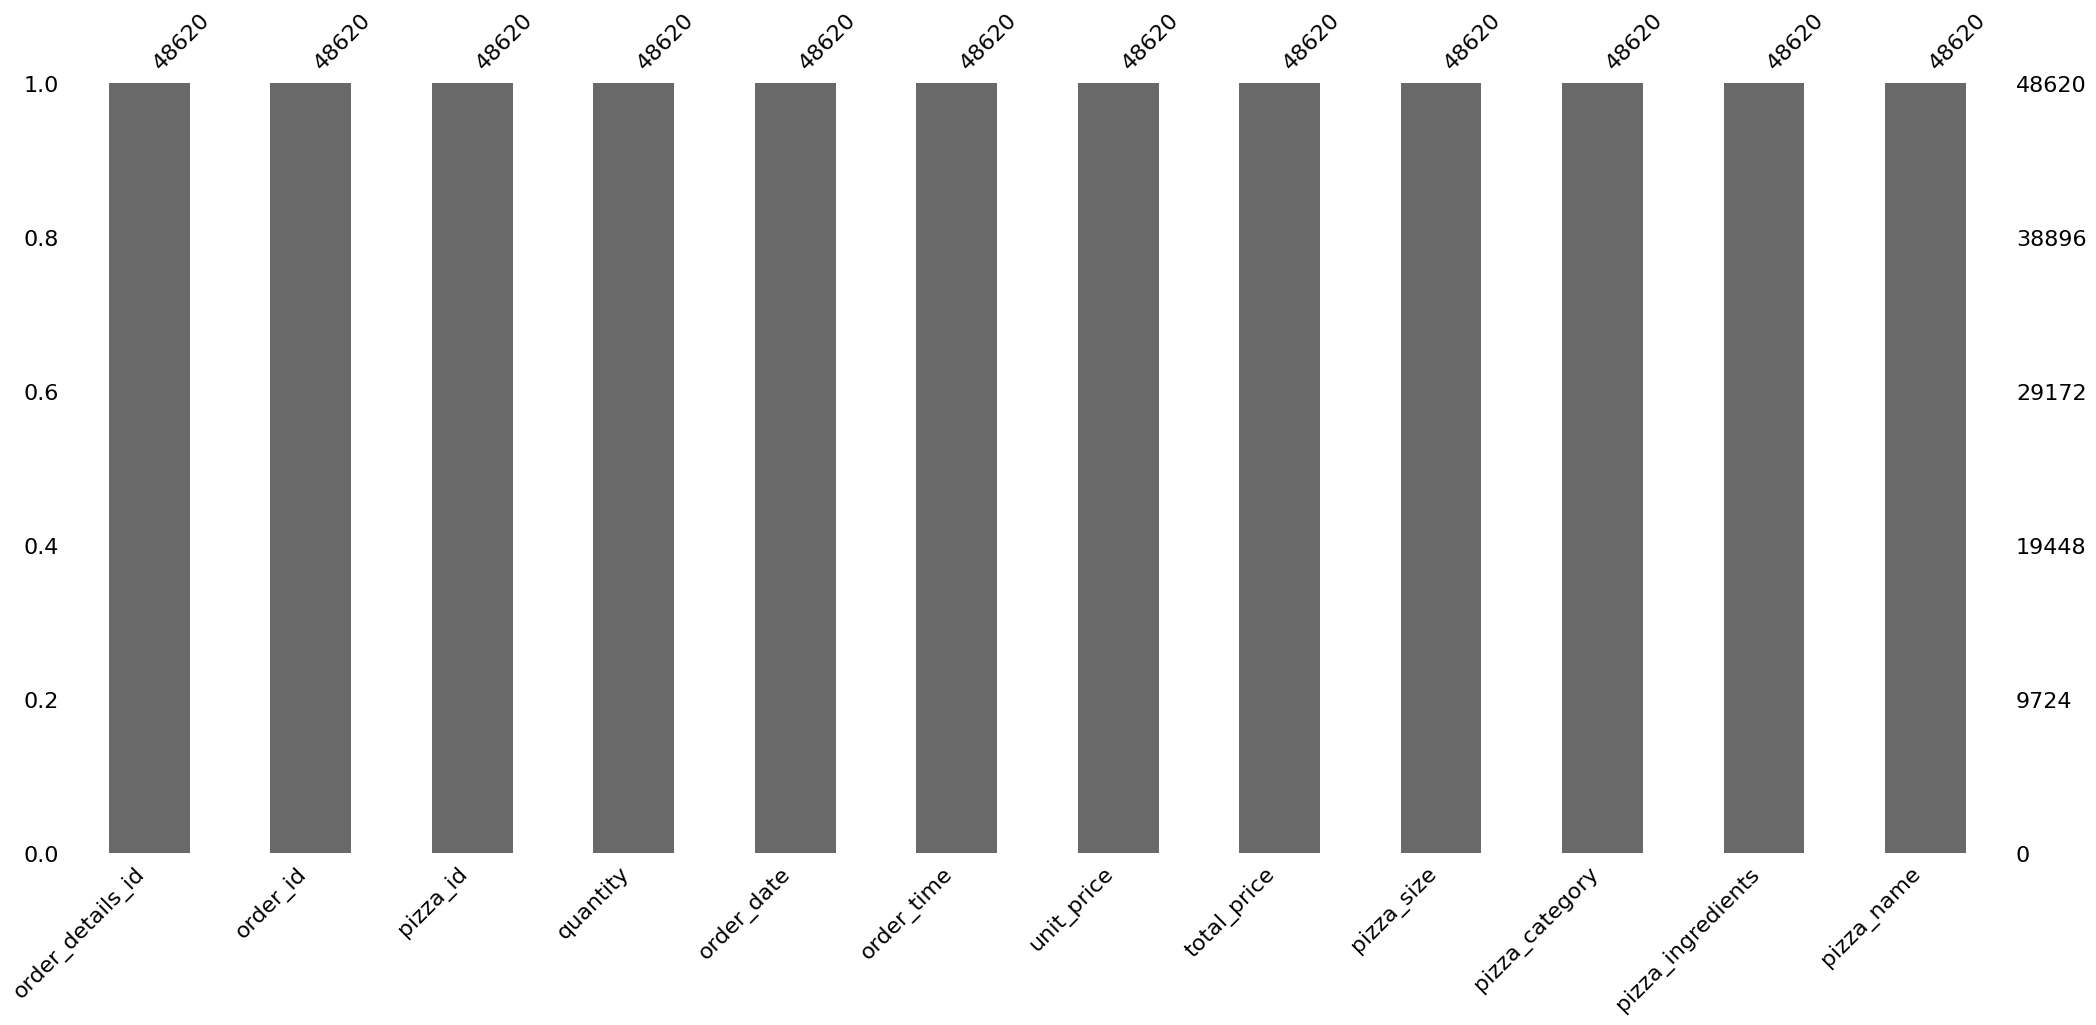

In [13]:
missingno.bar(df)
plt.show()

<Axes: >

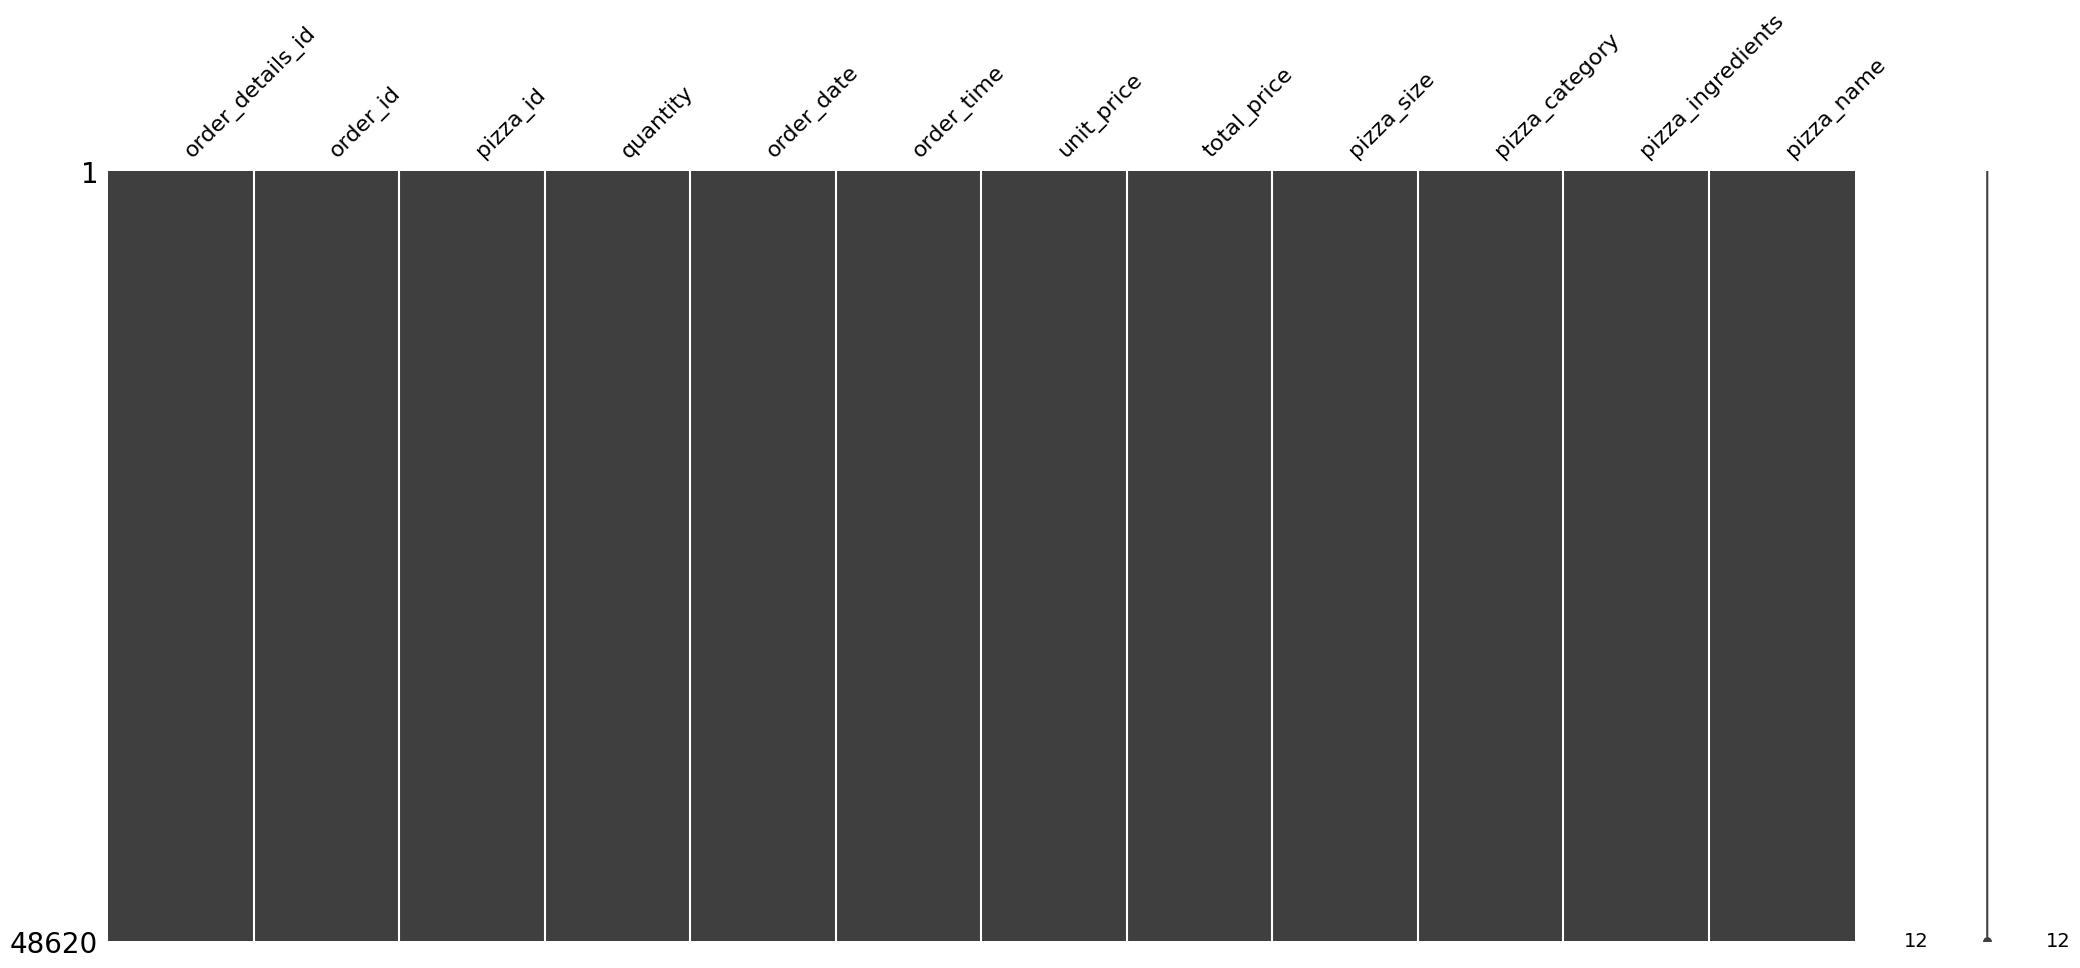

In [14]:
missingno.matrix(df)

In [18]:
sns

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

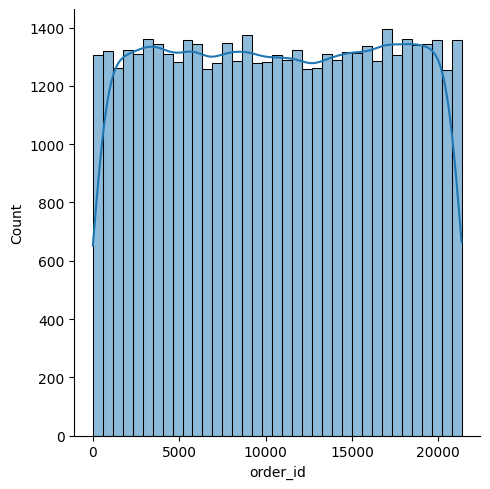

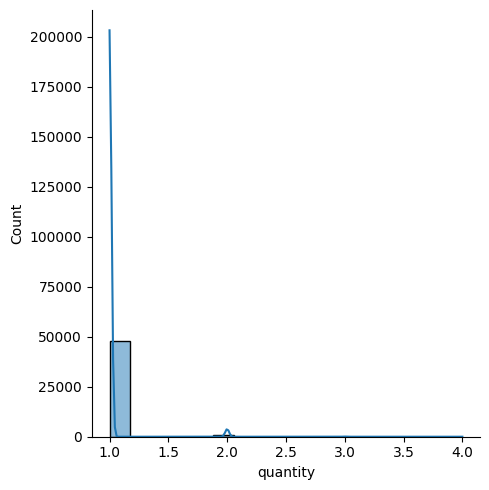

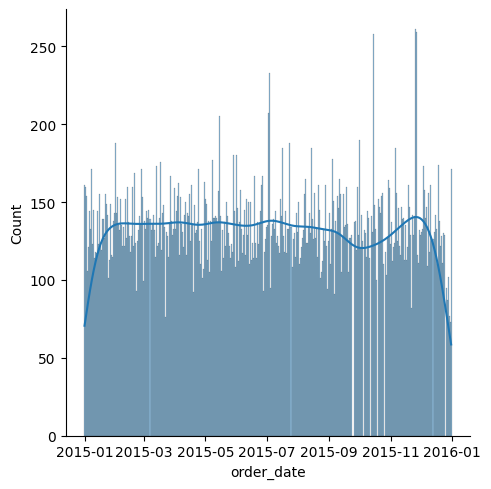

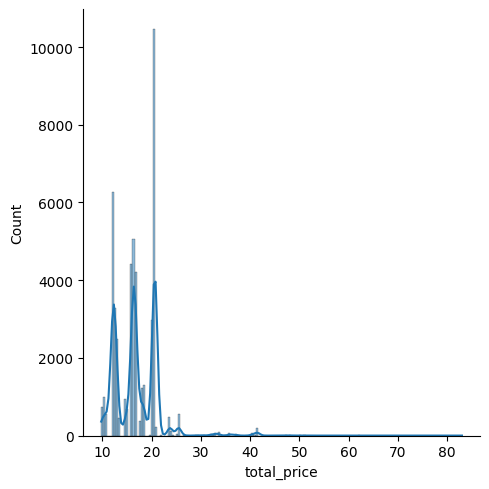

In [26]:
sns.displot(df['order_id'], kde=True)
sns.displot(df['quantity'], kde=True)
sns.displot(df['order_date'], kde=True)
sns.displot(df['total_price'], kde=True)
plt.show()




<ipython-input-32-0cfc306fcfb3>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pizza_size_quantity, x='quantity', y='pizza_size', ci=None, palette='muted')
<ipython-input-32-0cfc306fcfb3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pizza_size_quantity, x='quantity', y='pizza_size', ci=None, palette='muted')


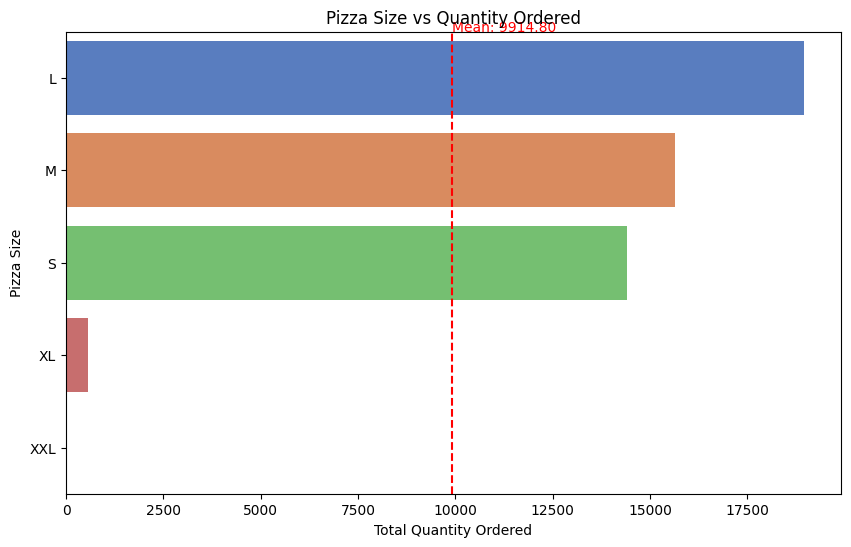

In [32]:
pizza_size_quantity = df.groupby('pizza_size')['quantity'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=pizza_size_quantity, x='quantity', y='pizza_size', ci=None, palette='muted')
mean_quantity = pizza_size_quantity['quantity'].mean()

plt.title('Pizza Size vs Quantity Ordered')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Pizza Size')
plt.axvline(mean_quantity, color='red', linestyle='--')
plt.text(mean_quantity, -0.5, f'Mean: {mean_quantity:.2f}', color='red')

plt.show()

In [33]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [40]:


df['order_date'] = pd.to_datetime(df['order_date'])
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.time
df['day_of_week'] = df['order_date'].dt.day_name()
df['hour_of_day'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour

order_counts_by_day = df.groupby('day_of_week')['order_id'].nunique().reset_index()
order_counts_by_hour = df.groupby('hour_of_day')['order_id'].nunique().reset_index()


fig_day = px.bar(order_counts_by_day, x='day_of_week', y='order_id',
                 title='Total Orders by Day of the Week',
                 labels={'order_id': 'Number of Orders', 'day_of_week': 'Day of the Week'})
fig_day.show()

fig_hour = px.bar(order_counts_by_hour, x='hour_of_day', y='order_id',
                  title='Total Orders by Hour of the Day',
                  labels={'order_id': 'Number of Orders', 'hour_of_day': 'Hour of the Day'})
fig_hour.show()


In [41]:
pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 19.9 MB/s eta 0:00:00


In [42]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Pizza Sales Dashboard"),
    dcc.Dropdown(
        id='pizza_size_dropdown',
        options=[{'label': size, 'value': size} for size in df['pizza_size'].unique()],
        value=df['pizza_size'].unique()[0],
        clearable=False
    ),
    dcc.Graph(id='orders_by_day_graph'),
    dcc.Graph(id='orders_by_hour_graph')
])

@app.callback(
    [Output('orders_by_day_graph', 'figure'),
     Output('orders_by_hour_graph', 'figure')],
    [Input('pizza_size_dropdown', 'value')]
)
def update_graphs(selected_size):
    filtered_df = df[df['pizza_size'] == selected_size]
    orders_by_day = filtered_df.groupby('day_of_week')['order_id'].nunique().reset_index()
    orders_by_hour = filtered_df.groupby('hour_of_day')['order_id'].nunique().reset_index()

    fig_day = px.bar(orders_by_day, x='day_of_week', y='order_id', title='Orders by Day of the Week')
    fig_hour = px.bar(orders_by_hour, x='hour_of_day', y='order_id', title='Orders by Hour of the Day')

    return fig_day, fig_hour

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [44]:

from dash import dcc, html
from dash.dependencies import Input, Output

pizza_sales = df.groupby('pizza_name')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Pizza Sales Analysis'),

    html.Div(children='''
        Best and worst-selling pizzas.
    '''),

    dcc.Dropdown(
        id='sort_order',
        options=[
            {'label': 'Best Selling', 'value': 'desc'},
            {'label': 'Worst Selling', 'value': 'asc'}
        ],
        value='desc',
        clearable=False
    ),

    dcc.Graph(
        id='sales_graph'
    )
])

@app.callback(
    Output('sales_graph', 'figure'),
    [Input('sort_order', 'value')]
)
def update_figure(selected_order):
    sorted_pizza_sales = pizza_sales.sort_values('quantity', ascending=(selected_order == 'asc'))
    fig = px.bar(sorted_pizza_sales, x='pizza_name', y='quantity',
                 title='Pizza Sales Quantity',
                 labels={'quantity': 'Total Quantity Sold', 'pizza_name': 'Pizza Name'})
    fig.update_layout(transition_duration=500)
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [46]:

agg_df = df.groupby(['order_date', 'pizza_size']).agg({'quantity': 'sum'}).reset_index()

agg_df['order_date_str'] = agg_df['order_date'].dt.strftime('%Y-%m-%d')

fig = px.scatter(agg_df, x='order_date_str', y='quantity',
                 animation_frame='order_date_str', animation_group='pizza_size',
                 size='quantity', color='pizza_size', hover_name='pizza_size',
                 log_y=True, size_max=55, range_y=[1, agg_df['quantity'].max() + 10])

fig.show()


In [50]:

numerical_df = df[['quantity', 'unit_price', 'order_id']]

corr_matrix = numerical_df.corr()

fig = px.imshow(corr_matrix,
                text_auto=True,
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='RdBu_r',
                title='Correlation Matrix of Pizza Sales Data')
fig.show()


In [51]:


df['order_date'] = pd.to_datetime(df['order_date'])

df['month_year'] = df['order_date'].dt.strftime('%Y-%m')


monthly_sales = df.groupby('month_year')['total_price'].sum().reset_index()


monthly_sales.sort_values('month_year', inplace=True)


fig = px.bar(monthly_sales, x='month_year', y='total_price',
             title='Total Pizza Sales by Month',
             labels={'total_price': 'Total Sales', 'month_year': 'Month-Year'},
             color='total_price',
             color_continuous_scale=px.colors.sequential.Viridis)


fig.show()


In [52]:

df['order_date'] = pd.to_datetime(df['order_date'])

df['month_year'] = df['order_date'].dt.strftime('%Y-%m')

fig = px.box(df, x='month_year', y='total_price',
             title='Distribution of Pizza Sales by Month',
             labels={'total_price': 'Total Sales', 'month_year': 'Month-Year'},
             color='month_year',
             category_orders={'month_year': sorted(df['month_year'].unique())})
fig.show()
